In [41]:
from collections import defaultdict
import os
import json

data_dir = r"C:\Users\gac8\PycharmProjects\PSSearch\Gian_experimental\NSGAIICustom\testing_in_vitro\v4"
files = os.listdir(data_dir)
files = [os.path.join(data_dir, file_name) for file_name in files if file_name.endswith(".json")]

operators = ["tm", "cm", "tc", "cc"]
contents_by_generation = defaultdict(list)

generations = set()
genome_thresholds = set()
for file in files:
    with open(file, "r") as f:
        file_data = json.load(f)
        for item in file_data:
            generation = item["generation"]
            genome_threshold = item["genome_threshold"]
            
            generations.add(generation)
            genome_thresholds.add(genome_threshold)
            
            for operator in operators:
                contents_by_generation[(genome_threshold, generation, operator)].extend(item[operator])
                


In [45]:
def compare_histograms(
    data1,
    data2,
    bins=30,
    log_x=False,
    log_y=False,
    labels=("Data 1", "Data 2"),
    title="Histogram Comparison",
    figsize=(6, 4),
    ax=None,
):
    """
    Creates a histogram comparison plot of two datasets on a given Axes or a new figure.

    Returns:
        matplotlib.figure.Figure or None: The created figure if ax is None.
    """
    data1 = np.array(data1)
    data2 = np.array(data2)

    if log_x:
        data1 = data1[data1 > 0]
        data2 = data2[data2 > 0]
        combined = np.concatenate([data1, data2])
        min_val = combined.min()
        max_val = combined.max()
        bins = np.logspace(np.log10(min_val), np.log10(max_val), bins)

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = None  # When plotting on provided ax, don't return a new figure

    ax.hist(data1, bins=bins, alpha=0.5, label=labels[0], edgecolor='black')
    ax.hist(data2, bins=bins, alpha=0.5, label=labels[1], edgecolor='black')

    if log_x:
        ax.set_xscale('log')
    if log_y:
        ax.set_yscale('log')

    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.set_title(title)
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    return fig

def display_side_by_side(histogram_args_list, figsize_per_plot=(5, 5)):
    """
    Displays multiple histograms side-by-side using `compare_histograms`.

    Parameters:
        histogram_args_list (list[dict]): Each dict contains args for `compare_histograms`.
        figsize_per_plot (tuple): Size per individual plot; used to scale total figure.
    """
    num = len(histogram_args_list)
    total_figsize = (figsize_per_plot[0] * num, figsize_per_plot[1])
    fig, axs = plt.subplots(1, num, figsize=total_figsize)

    if num == 1:
        axs = [axs]  # Ensure it's iterable

    for args, ax in zip(histogram_args_list, axs):
        compare_histograms(ax=ax, **args)

    plt.tight_layout()
    plt.show()


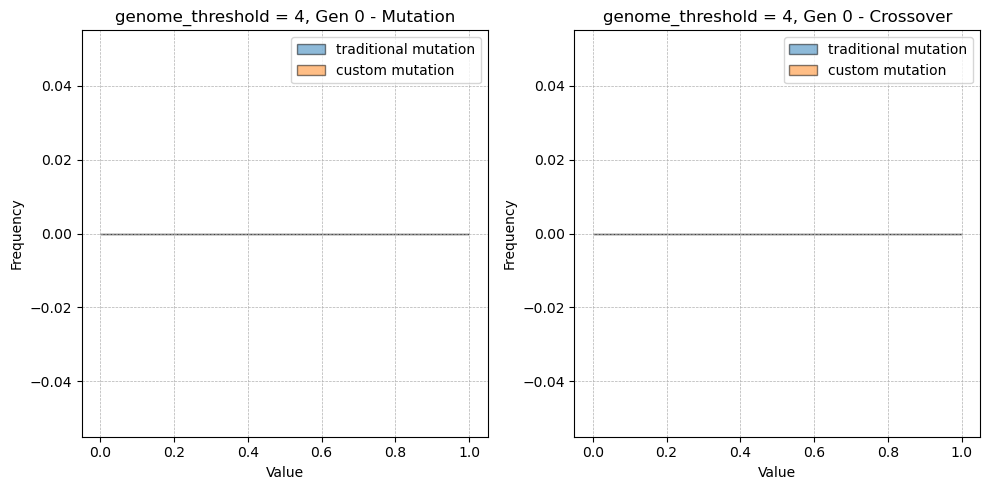

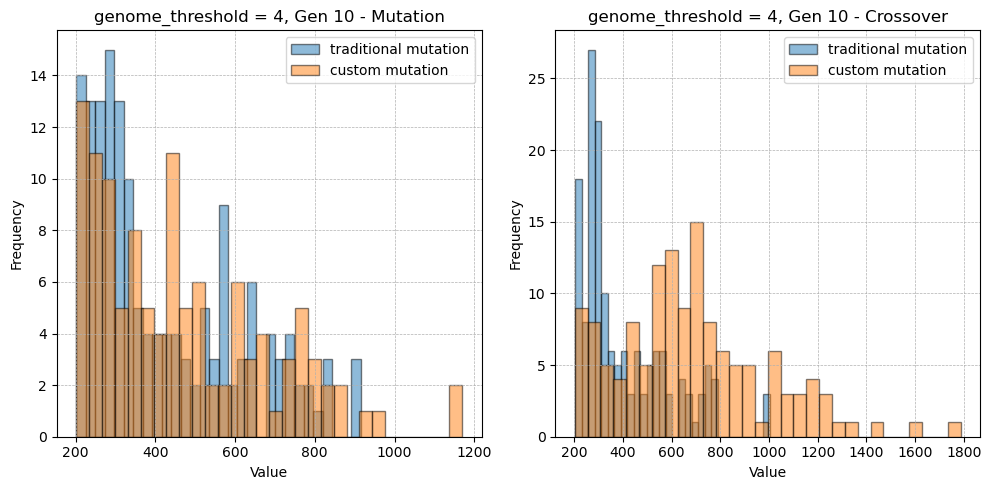

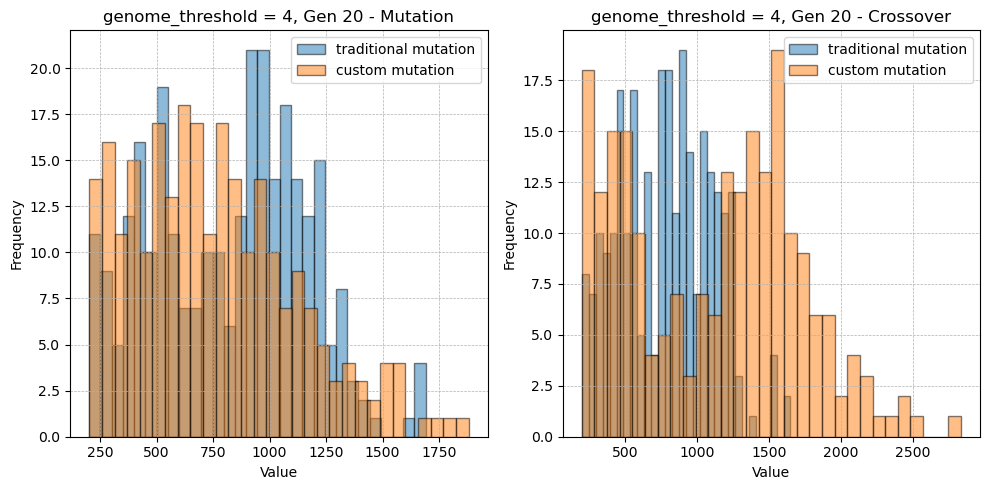

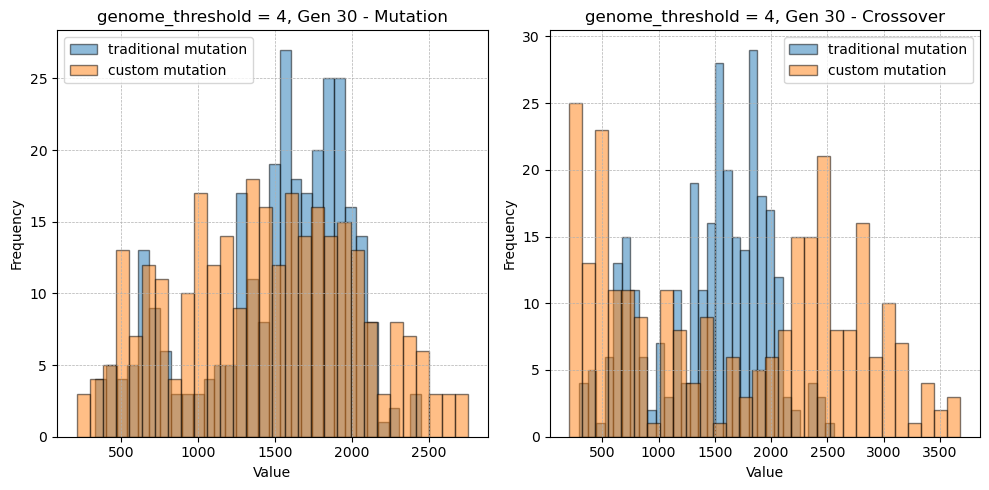

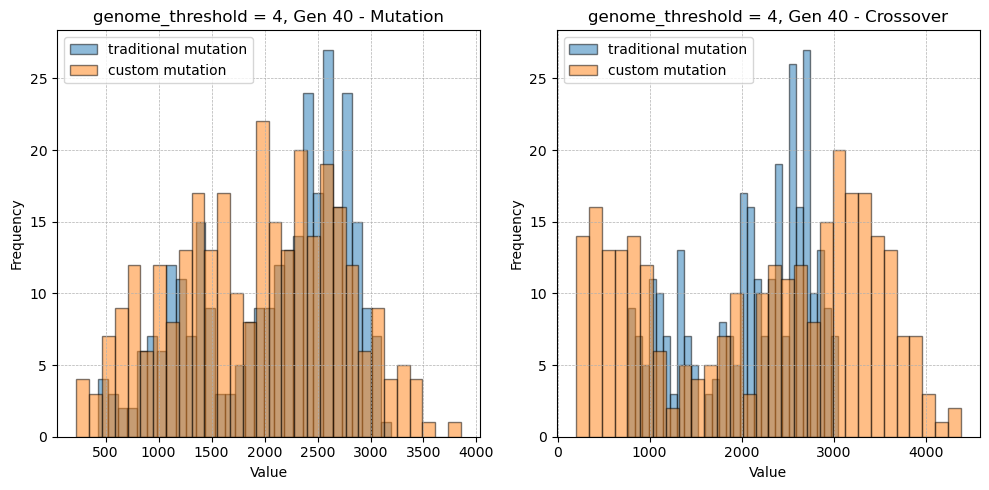

In [52]:
cbg = contents_by_generation

def not_low(values):
    return [value for value in values if value > 200]

for genome_threshold in [4]:
    for generation in range(0, 45, 10):
    
        tm_data = not_low(cbg[genome_threshold, generation, "tm"])
        cm_data = not_low(cbg[genome_threshold, generation, "cm"])
        tc_data = not_low(cbg[genome_threshold, generation, "tc"])
        cc_data = not_low(cbg[genome_threshold, generation, "cc"])

        display_side_by_side([
            {
                "data1": tm_data,
                "data2": cm_data,
                "title": f"genome_threshold = {'all' if genome_threshold is None else repr(genome_threshold)}, Gen {generation} - Mutation",
                "labels": ("traditional mutation", "custom mutation")
            },
            {
                "data1": tc_data,
                "data2": cc_data,
                "title": f"genome_threshold = {'all' if genome_threshold is None else repr(genome_threshold)}, Gen {generation} - Crossover",
                "labels": ("traditional mutation", "custom mutation")
            }
        ])

        
    